In [102]:
from PIL import Image 
import numpy as np

In [103]:
img = Image.open("peppers.jpeg")

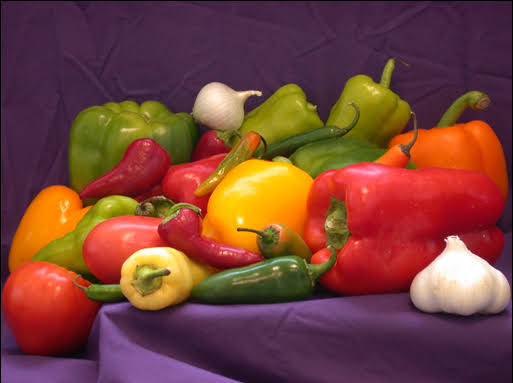

In [104]:
img

In [105]:
img.size

(513, 383)

In [106]:
arr = np.array(img)
arr_r = arr[:,:,0]
arr_g = arr[:,:,1]
arr_b = arr[:,:,2]

In [123]:
def pca(arr):
    eig_val, eig_vec = np.linalg.eigh(np.cov(arr))
    s = np.argsort(eig_val)
    s = s[::-1]
    eig_vec = eig_vec[:,s]
    eig_val = eig_val[s]
    num = 350
    eig_vec = eig_vec[:, range(num)]
    recon_img = np.uint8(np.absolute(np.dot(eig_vec, np.dot(eig_vec.T, arr))))
    return recon_img

In [124]:
arr_r_recon = pca(arr_r)
arr_g_recon = pca(arr_g)
arr_b_recon = pca(arr_b)

In [125]:
arr_recon = np.dstack((arr_r_recon, arr_g_recon, arr_b_recon))

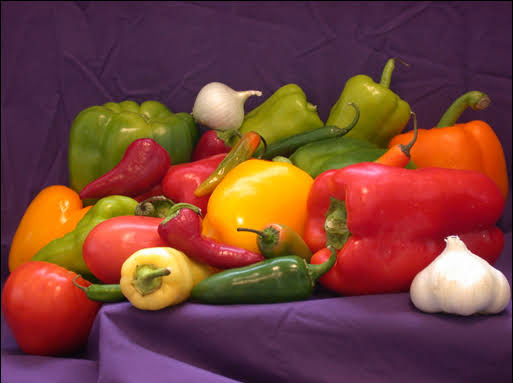

In [126]:
recon_img = Image.fromarray(arr_recon)
recon_img